# Calcular a Quantidade de Impactos Prováveis com a Terra
---
Esse programa utiliza os dados disponíveis pela NASA no site do [kaggle](https://www.kaggle.com/nasa/asteroid-impacts) sobre a quantidade de impactos possíveis de asteróides com a Terra em uma faixa pré-estabelecida de tempo. Esse cálculo levará em conta variváveis como Escala de Palermo, a velocidade do objeto, o seu diâmetro, os anos iniciais e finais da contagem e a possibilidade de impacto cumulativa.

In [2]:
""" Importando bibliotecas necessárias """
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
"""Lendo dados do arquivo CSV"""
asteroid_model = pd.read_csv('impacts.csv')

asteroid_model.dropna(axis=0)

asteroid_model.describe()

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
count,680.000000,680.000000,680.000000,6.800000e+02,680.000000,680.000000,680.000000,680.000000,680.000000,680.0
mean,2061.026471,2098.242647,43.413235,1.000516e-01,11.460265,26.185588,30.523574,-6.533059,-6.825838,0.0
std,29.556703,22.181371,113.996453,2.493938e+00,6.074337,2.354571,113.755621,1.477209,1.442007,0.0
min,2017.000000,2017.000000,1.000000,1.100000e-10,0.340000,15.600000,0.010000,-10.980000,-11.000000,0.0
25%,2034.000000,2089.750000,2.000000,1.100000e-07,7.245000,25.075000,6.000000,-7.490000,-7.800000,0.0
50%,2061.000000,2109.000000,6.000000,1.700000e-06,10.460000,26.450000,14.000000,-6.470000,-6.795000,0.0
75%,2085.000000,2114.000000,29.000000,1.500000e-05,14.810000,27.800000,28.000000,-5.510000,-5.897500,0.0
max,2115.000000,2117.000000,1144.000000,6.500000e+01,39.470000,31.600000,2579.000000,-2.170000,-2.170000,0.0


In [4]:
"""Escolhendo os parâmtros X e y da regressão"""
x_parameters = ['Period Start', 'Period End', 'Asteroid Velocity', 'Asteroid Diameter (km)', 
                'Cumulative Impact Probability', 'Cumulative Palermo Scale', 'Maximum Palermo Scale']

X = asteroid_model[x_parameters]

y = asteroid_model['Possible Impacts']

In [22]:
"""Separando o conjunto de dados em dados de teste e dados de treino"""
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2)

train_X.head()

,Period Start,Period End,Asteroid Velocity,Asteroid Diameter (km),Cumulative Impact Probability,Cumulative Palermo Scale,Maximum Palermo Scale
643,2108,2116,8.81,9.00,2.000000e-05,-6.50,-6.56
55,2020,2087,10.02,44.00,1.800000e-08,-6.74,-7.08
618,2103,2109,14.73,17.00,4.000000e-07,-7.27,-7.50
101,2023,2047,11.84,0.01,5.100000e-05,-4.79,-4.79
218,2042,2115,16.35,7.00,1.800000e-03,-4.13,-4.36


In [19]:
"""Função que retorna o erro absoluto médio da regressão"""
def get_mae(nodes, train_X, val_X, train_y, val_y):
    asteroid_reg = DecisionTreeRegressor(max_leaf_nodes=nodes, random_state=1)
    
    asteroid_reg.fit(train_X, train_y)
    prediction = asteroid_reg.predict(val_X)
    mae = mean_absolute_error(val_y, prediction)
    
    return mae

In [23]:
node_list = [2, 5, 10, 50, 100, 150, 200, 250, 300]

best_node = None
mae_min = get_mae(None, train_X, val_X, train_y, val_y)
for i in node_list:
    mae = get_mae(i, train_X, val_X, train_y, val_y)
    if mae < mae_min:
        best_node = i
        mae_min = mae

In [24]:
print('The best node for regression is {}\n The mae is {}'.format(best_node, mae_min))

The best node for regression is 100
 The mae is 29.527763060708573


In [39]:
import matplotlib.pyplot as plt

"""Função para plotar histograma"""
def create_hist(y):
    plt.hist(y, bins=10)
    plt.title('Histograma da Probabilidade de Impacto')
    plt.ylabel('Quantidade de Asteroides')
    plt.xlabel('Quantidade de Possíveis Impactos')
    
    plt.show()

118.6624240892903 49.65330185649594


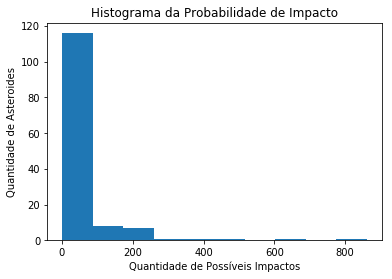

In [40]:
asteroid_reg = DecisionTreeRegressor(max_leaf_nodes=150, random_state=1)

asteroid_reg.fit(train_X, train_y)
prediction = asteroid_reg.predict(val_X)

mean = np.mean(prediction)
std_dev = np.std(prediction)

print(std_dev, mean)

create_hist(prediction)